In [102]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
import cv2 as cv
import random
from PIL import Image
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, MaxPool2D, Dropout
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [103]:
trainPath = 'C:\\Users\\JANAH\\Desktop\\CousreWork\\train'
valPath = 'C:\\Users\\JANAH\\Desktop\\CousreWork\\val'

CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]
train_data = tf.keras.utils.image_dataset_from_directory(
    trainPath,  # r prefix ensures backslashes are treated literally
    labels='inferred',                          # Automatically infer labels from folder names
    label_mode='categorical',                   # Encode labels as one-hot vectors
    image_size=(256, 256),                      # Resize images to 256x256 pixels
    batch_size=32                               # Load data in batches of 32
)



Found 10000 files belonging to 10 classes.


In [104]:
def loading_the_data(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            
            filepaths.append(fpath)
            labels.append(fold)

    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')

    df = pd.concat([Fseries, Lseries], axis=1)
    
    return df

In [105]:
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]
        
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(trainPath,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])
            
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(valPath,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

print(len(train_data))
print(len(test_data))
            


10000
1000


In [106]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

for lbl in train_data[:10]:
    print(lbl[1])
    
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

8
2
1
2
2
7
3
4
0
5


In [107]:

Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train),len(y_train),Y

(10000,
 10000,
 ['MOSAIC VIRUS',
  'HEALTHY',
  'EARLY BLIGHT',
  'HEALTHY',
  'HEALTHY',
  'TARGET SPOT',
  'LATE BLIGHT',
  'LEAF MOLD',
  'BACTERIAL SPOT',
  'SEPTORIA LEAF SPOT',
  'EARLY BLIGHT',
  'EARLY BLIGHT',
  'YELLOW LEAF CURL VIRUS',
  'EARLY BLIGHT',
  'LATE BLIGHT',
  'BACTERIAL SPOT',
  'EARLY BLIGHT',
  'BACTERIAL SPOT',
  'SPIDER MITE',
  'LATE BLIGHT',
  'YELLOW LEAF CURL VIRUS',
  'HEALTHY',
  'YELLOW LEAF CURL VIRUS',
  'EARLY BLIGHT',
  'YELLOW LEAF CURL VIRUS',
  'MOSAIC VIRUS',
  'LATE BLIGHT',
  'EARLY BLIGHT',
  'HEALTHY',
  'HEALTHY',
  'LEAF MOLD',
  'LEAF MOLD',
  'YELLOW LEAF CURL VIRUS',
  'HEALTHY',
  'MOSAIC VIRUS',
  'EARLY BLIGHT',
  'TARGET SPOT',
  'LEAF MOLD',
  'MOSAIC VIRUS',
  'SEPTORIA LEAF SPOT',
  'LEAF MOLD',
  'HEALTHY',
  'EARLY BLIGHT',
  'SPIDER MITE',
  'HEALTHY',
  'TARGET SPOT',
  'MOSAIC VIRUS',
  'SEPTORIA LEAF SPOT',
  'LEAF MOLD',
  'LATE BLIGHT',
  'YELLOW LEAF CURL VIRUS',
  'SEPTORIA LEAF SPOT',
  'EARLY BLIGHT',
  'MOSAIC VIR

In [108]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")


len(X_test),len(y_test),Z

(1000,
 1000,
 ['HEALTHY',
  'MOSAIC VIRUS',
  'BACTERIAL SPOT',
  'LEAF MOLD',
  'YELLOW LEAF CURL VIRUS',
  'SEPTORIA LEAF SPOT',
  'SEPTORIA LEAF SPOT',
  'LATE BLIGHT',
  'TARGET SPOT',
  'TARGET SPOT',
  'LATE BLIGHT',
  'LEAF MOLD',
  'SEPTORIA LEAF SPOT',
  'HEALTHY',
  'HEALTHY',
  'SPIDER MITE',
  'SEPTORIA LEAF SPOT',
  'HEALTHY',
  'LEAF MOLD',
  'SPIDER MITE',
  'SPIDER MITE',
  'EARLY BLIGHT',
  'HEALTHY',
  'EARLY BLIGHT',
  'SPIDER MITE',
  'LEAF MOLD',
  'MOSAIC VIRUS',
  'LEAF MOLD',
  'EARLY BLIGHT',
  'TARGET SPOT',
  'MOSAIC VIRUS',
  'TARGET SPOT',
  'BACTERIAL SPOT',
  'SEPTORIA LEAF SPOT',
  'TARGET SPOT',
  'LEAF MOLD',
  'EARLY BLIGHT',
  'EARLY BLIGHT',
  'SPIDER MITE',
  'EARLY BLIGHT',
  'EARLY BLIGHT',
  'BACTERIAL SPOT',
  'YELLOW LEAF CURL VIRUS',
  'SEPTORIA LEAF SPOT',
  'SPIDER MITE',
  'TARGET SPOT',
  'LATE BLIGHT',
  'TARGET SPOT',
  'BACTERIAL SPOT',
  'SPIDER MITE',
  'SEPTORIA LEAF SPOT',
  'BACTERIAL SPOT',
  'LATE BLIGHT',
  'SEPTORIA LEAF SPOT

In [109]:
len(X_test),len(y_test)

X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(1000, 64, 64, 3)

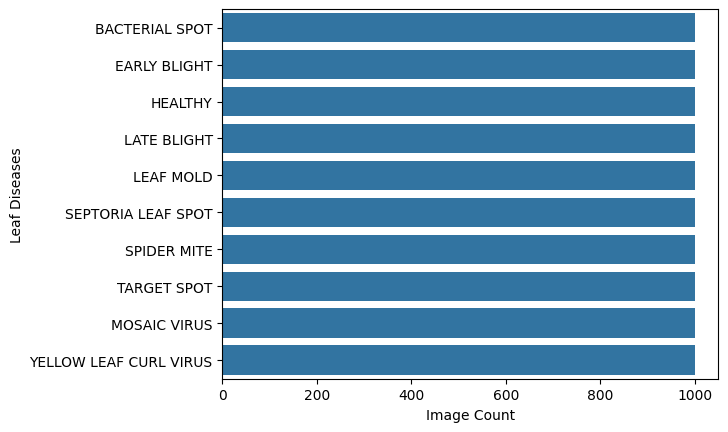

In [110]:
order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']


ax=sns.countplot(Y, order=order)
ax.set_ylabel("Leaf Diseases")
ax.set_xlabel("Image Count")
plt.show()


In [111]:
from keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [112]:
#convolution 
classifier=Sequential()
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))


#Dense 
classifier.add(Flatten())

classifier.add(Dense(512, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.4))

classifier.add(Dense(1024, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(512, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(256, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))

classifier.add(Dense(10, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_63 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_64 (Dropout)        (None, 14, 14, 64)       

In [113]:
hist=classifier.fit(X_train,one_hot_train,epochs=80,batch_size=100,validation_split=0.2)

Epoch 1/80
80/80 [==============================] - 3s 27ms/step - loss: 2.5329 - accuracy: 0.2189 - val_loss: 2.0482 - val_accuracy: 0.2315
Epoch 2/80
80/80 [==============================] - 2s 24ms/step - loss: 1.5814 - accuracy: 0.4514 - val_loss: 3.0801 - val_accuracy: 0.1480
Epoch 3/80
80/80 [==============================] - 2s 23ms/step - loss: 1.0093 - accuracy: 0.6456 - val_loss: 4.8819 - val_accuracy: 0.1530
Epoch 4/80
80/80 [==============================] - 2s 23ms/step - loss: 0.7513 - accuracy: 0.7408 - val_loss: 3.2029 - val_accuracy: 0.2390
Epoch 5/80
80/80 [==============================] - 2s 23ms/step - loss: 0.6543 - accuracy: 0.7653 - val_loss: 1.8869 - val_accuracy: 0.4210
Epoch 6/80
80/80 [==============================] - 2s 24ms/step - loss: 0.5535 - accuracy: 0.8067 - val_loss: 1.0468 - val_accuracy: 0.6400
Epoch 7/80
80/80 [==============================] - 2s 24ms/step - loss: 0.4774 - accuracy: 0.8314 - val_loss: 2.0440 - val_accuracy: 0.4860
Epoch 8/80
80

In [114]:
test_loss,test_accuracy=classifier.evaluate(X_test,one_hot_test)
test_loss,test_accuracy

32/32 [==============================] - 1s 9ms/step - loss: 0.4845 - accuracy: 0.8760


(0.48450320959091187, 0.8759999871253967)

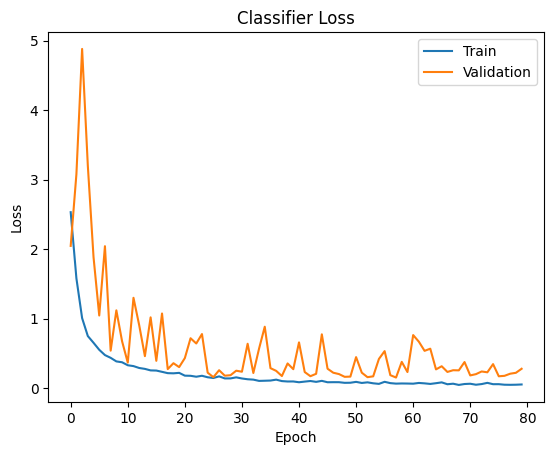

In [116]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

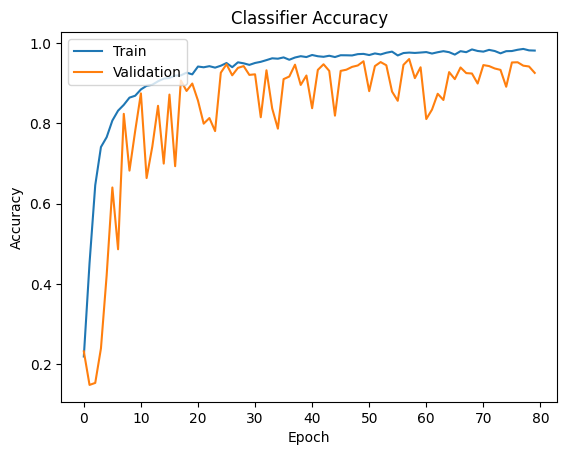

In [117]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


In [125]:
from tensorflow.keras.utils import img_to_array, load_img

def predict_image(image_path, model):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Make the prediction
    prediction = classifier.predict(img_array)
    predicted_class = np.argmax(prediction, axis=-1)
    return predicted_class[0]

def get_class_label(predicted_class, index_to_class):
    return index_to_class[predicted_class]

def visualize_prediction(image_path, predicted_class_label):
    # Load the image (original size) for visualization
    img = load_img(image_path)
    plt.imshow(img)
    
    # Set the title with the predicted label
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis('off')
    
    # Display the image
    plt.show()

# Example usage
image_path = "val/Tomato___Target_Spot/0c4c7140-1059-4e3a-a6e2-15c4bdd46743___Com.G_TgS_FL 8142.JPG"
predicted_class = predict_image(image_path, classifier)
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
predicted_class_label = get_class_label(predicted_class, index_to_class)

# Visualize the prediction
visualize_prediction(image_path, predicted_class_label)

ValueError: in user code:

    File "C:\Users\JANAH\miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\JANAH\miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\JANAH\miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\JANAH\miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\JANAH\miniconda3\envs\tf-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\JANAH\miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(None, 150, 150, 3)


In [120]:
# Assuming 'model' is your trained model
classifier.save("tomatoModel.h5")

print("Model saved successfully!")


Model saved successfully!
